## Liver Disease Classification 
#### Dataset Description:
This dataset is used for liver disease classification to determine whether a patient has liver disease based on a set of diagnostic attributes. It contains 30,691 patient records with demographic and biochemical test results. The label column (Result) indicates whether the patient is diagnosed with liver disease.

| Column Name                               | Description                                                                   |
| ----------------------------------------- | ----------------------------------------------------------------------------- |
| **Age of the patient**                    | Age in years                                                                  |
| **Gender of the patient**                 | Gender (`Male` or `Female`)                                                   |
| **Total Bilirubin**                       | Total bilirubin level in mg/dL. High levels indicate liver dysfunction.       |
| **Direct Bilirubin**                      | Direct (conjugated) bilirubin level. Helps detect type of jaundice.           |
| **Alkphos Alkaline Phosphotase**          | Enzyme related to bile ducts; often high in liver disease.                    |
| **Sgpt Alamine Aminotransferase (ALT)**   | Liver enzyme; elevated in liver damage.                                       |
| **Sgot Aspartate Aminotransferase (AST)** | Another liver enzyme; also high in liver injury.                              |
| **Total Proteins**                        | Total protein concentration in blood (albumin + globulin).                    |
| **ALB Albumin**                           | A protein made by the liver; low in liver disease.                            |
| **A/G Ratio Albumin and Globulin Ratio**  | Ratio of albumin to globulin proteins; imbalance indicates liver dysfunction. |
| **Result**                                | **Target label**: `1` if the patient **has** no liver disease, `2` otherwise. |


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("LiverPatient_data.csv", encoding='latin-1')
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [6]:
df.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')

In [7]:
# Step 1: Data Cleaning and Encoding

# First, clean column names (remove whitespace and special characters)
df.columns = df.columns.str.strip().str.replace('\xa0', '', regex=True).str.replace(' ', '_')

# Check for missing values
missing_values = df.isnull().sum()

# Display cleaned column names and missing value counts
df.columns.tolist(), missing_values


(['Age_of_the_patient',
  'Gender_of_the_patient',
  'Total_Bilirubin',
  'Direct_Bilirubin',
  'Alkphos_Alkaline_Phosphotase',
  'Sgpt_Alamine_Aminotransferase',
  'Sgot_Aspartate_Aminotransferase',
  'Total_Protiens',
  'ALB_Albumin',
  'A/G_Ratio_Albumin_and_Globulin_Ratio',
  'Result'],
 Age_of_the_patient                        2
 Gender_of_the_patient                   902
 Total_Bilirubin                         648
 Direct_Bilirubin                        561
 Alkphos_Alkaline_Phosphotase            796
 Sgpt_Alamine_Aminotransferase           538
 Sgot_Aspartate_Aminotransferase         462
 Total_Protiens                          463
 ALB_Albumin                             494
 A/G_Ratio_Albumin_and_Globulin_Ratio    559
 Result                                    0
 dtype: int64)

In [8]:
# Drop rows with any missing values
df_cleaned = df.dropna()

df_cleaned.shape

(27158, 11)

In [9]:
# Encode 'Gender_of_the_patient' as binary (Male: 1, Female: 0)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['Gender_of_the_patient'] = le.fit_transform(df_cleaned['Gender_of_the_patient'])

# Check the shape of cleaned data
print("Cleaned Data Shape:", df_cleaned.shape)

# Check class distribution of target column
print("Class Distribution:\n", df_cleaned['Result'].value_counts())


Cleaned Data Shape: (27158, 11)
Class Distribution:
 Result
1    19478
2     7680
Name: count, dtype: int64


C:\Users\shiva\AppData\Local\Temp\ipykernel_21376\13720943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender_of_the_patient'] = le.fit_transform(df_cleaned['Gender_of_the_patient'])


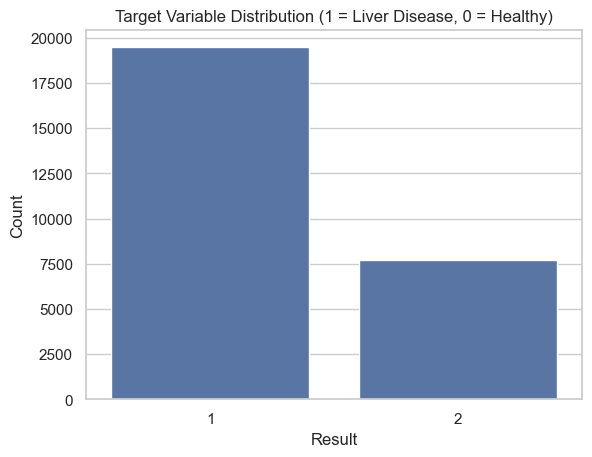

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# 1. Class balance
sns.countplot(data=df_cleaned, x='Result')
plt.title("Target Variable Distribution (1 = Liver Disease, 0 = Healthy)")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()


In [11]:
df_cleaned['Gender_of_the_patient'].value_counts()

Gender_of_the_patient
1    20034
0     7124
Name: count, dtype: int64

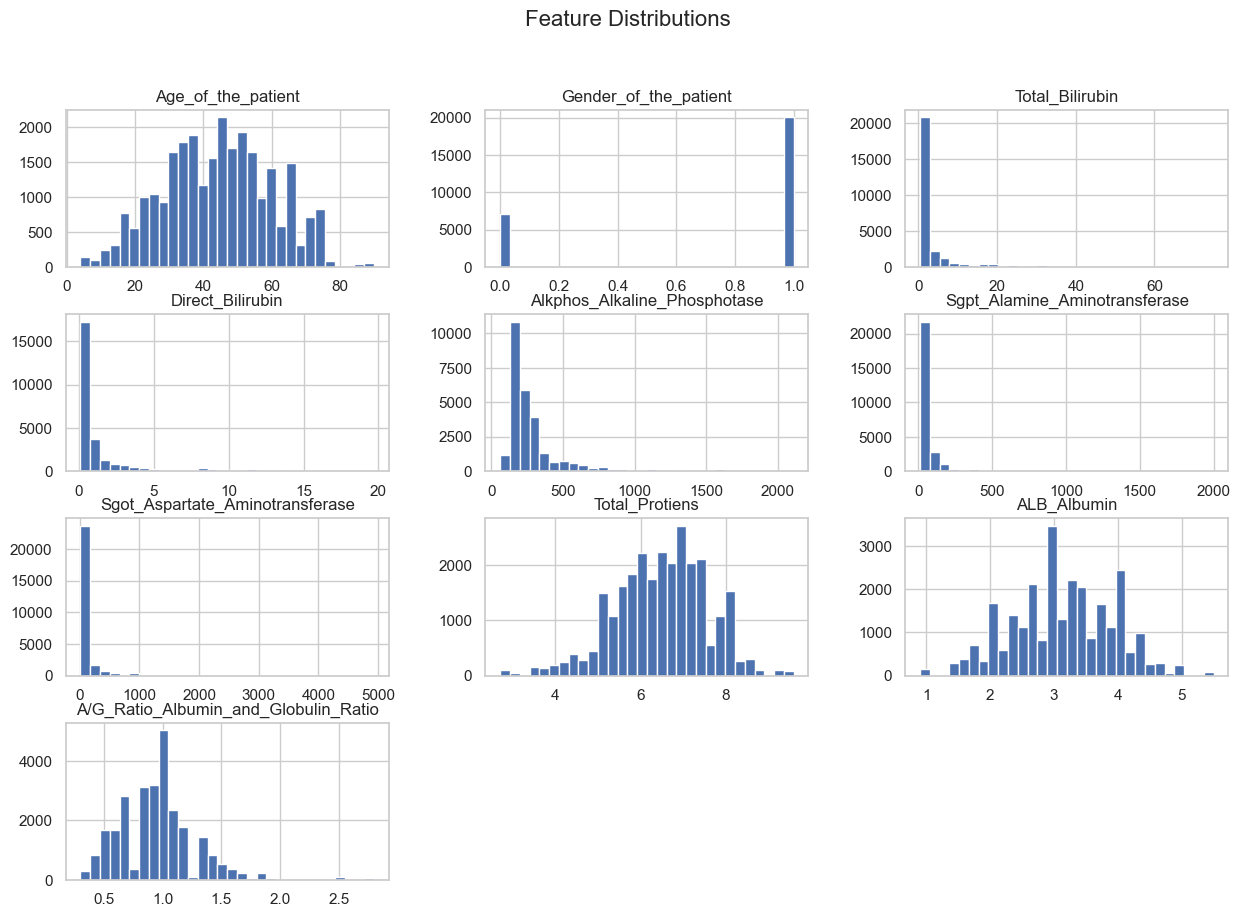

In [12]:
# 2. Histograms of numeric features
numeric_cols = df_cleaned.select_dtypes(include='number').columns.drop('Result')
df_cleaned[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


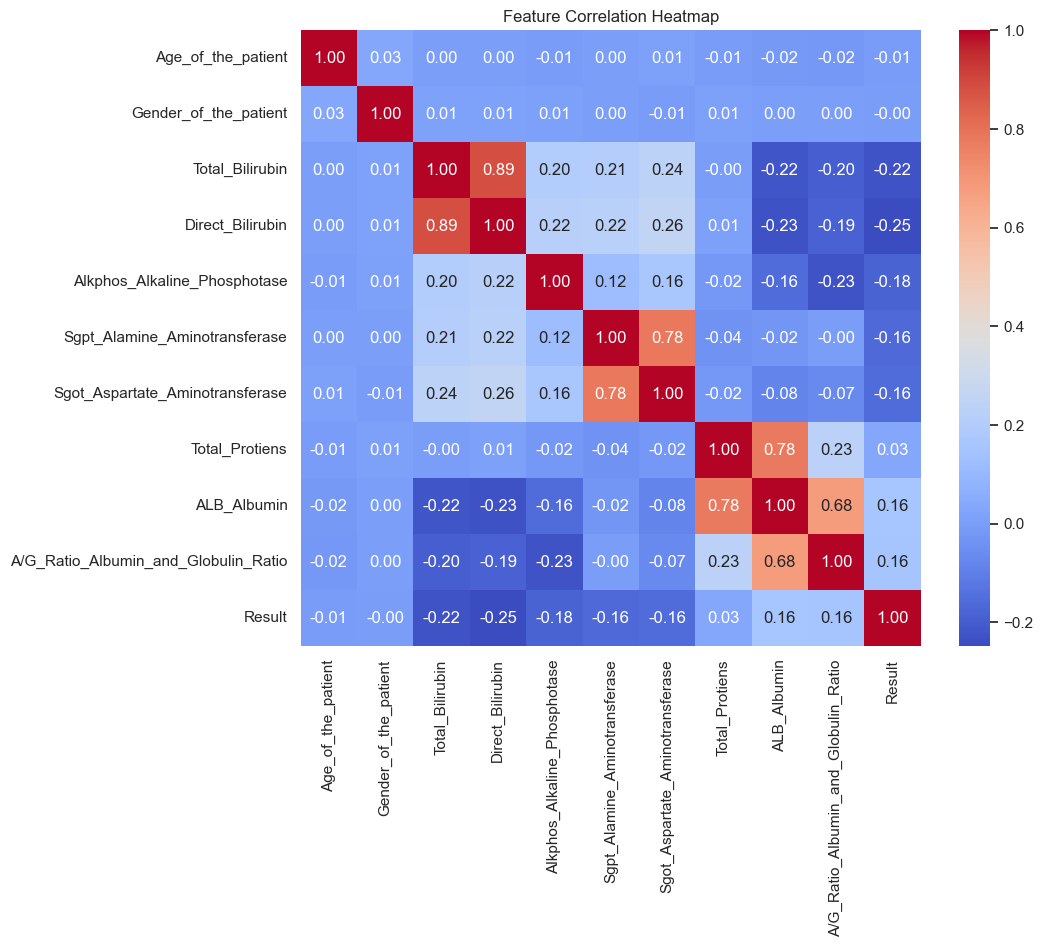

In [13]:
# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df_cleaned.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


#### Model 1: Logistic Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Split features and target
X = df_cleaned.drop('Result', axis=1)
y = df_cleaned['Result']


In [16]:
# 2. Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# 4. Build and train Logistic Regression with class_weight
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.55      0.69      3896
           2       0.43      0.86      0.57      1536

    accuracy                           0.64      5432
   macro avg       0.67      0.71      0.63      5432
weighted avg       0.77      0.64      0.65      5432



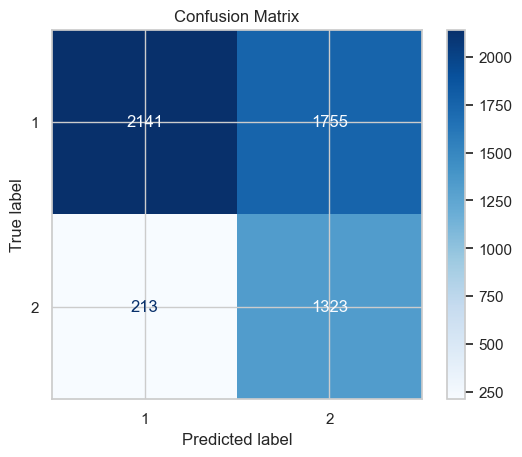

In [18]:
# 5. Predictions
y_pred = logreg.predict(X_test_scaled)

# 6. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#### Comments on Classification Report for Logistic Regression
| Metric    | Class 1 (Majority) | Class 2 (Minority) | Comment                                                                 |
| --------- | ------------------ | ------------------ | ----------------------------------------------------------------------- |
| Precision | 0.91               | 0.43               | Model is precise for Class 1 (few false positives) but not for Class 2. |
| Recall    | 0.55               | 0.86               | Class 2 recall is high — that’s good! But Class 1 recall is low.        |
| F1-score  | 0.69               | 0.57               | Indicates imbalance in performance.                                     |
| Accuracy  | 64%                |                    | Not reliable due to class imbalance.                                    |


- The model over-predicts the minority class (2) due to class_weight='balanced', hurting majority class recall.

- Precision–recall tradeoff is a common side effect in imbalanced classification using weighted Logistic Regression.


#### Model 2: Logistic Regression with Smote() 

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.57      0.70      3896
           2       0.43      0.83      0.57      1536

    accuracy                           0.64      5432
   macro avg       0.66      0.70      0.63      5432
weighted avg       0.76      0.64      0.66      5432



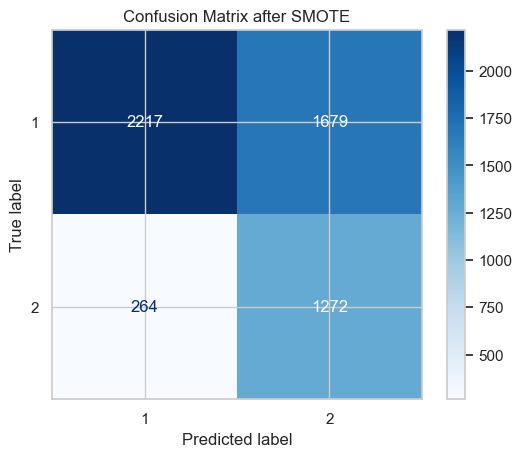

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Features and target
X = df_cleaned.drop('Result', axis=1)
y = df_cleaned['Result']

# 2. Train-test split (stratify to maintain original class ratios)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3. Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 4. Feature scaling
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# 5. Train Logistic Regression on balanced data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_bal_scaled, y_train_bal)

# 6. Predictions and Evaluation
y_pred = logreg.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix after SMOTE")
plt.show()


| Metric                  | Before SMOTE | After SMOTE | Change             |
| ----------------------- | ------------ | ----------- | ------------------ |
| **Accuracy**            | 0.64         | 0.64        |  No change       |
| **Precision (Class 1)** | 0.91         | 0.89        |  Slight drop     |
| **Recall (Class 1)**    | 0.55         | 0.57        | Slight increase |
| **Precision (Class 2)** | 0.43         | 0.43        | No change       |
| **Recall (Class 2)**    | 0.86         | 0.83        | Slight drop     |
| **F1-score (Class 2)**  | 0.57         | 0.57        | No change       |

Observations:
- SMOTE didn’t significantly improve the model's ability to correctly classify both classes using Logistic Regression.

- You’re likely facing model limitation, not just data imbalance.

- Logistic Regression is linear — not always effective when data has nonlinear relationships.


#### Random Forest Classifier

Random Forest Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3896
           2       1.00      1.00      1.00      1536

    accuracy                           1.00      5432
   macro avg       1.00      1.00      1.00      5432
weighted avg       1.00      1.00      1.00      5432



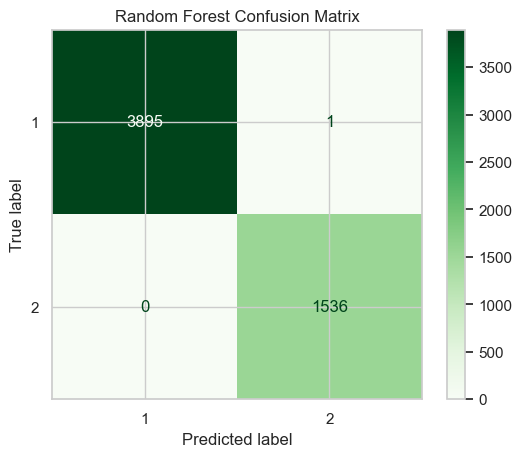

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Use the same train-test split from earlier


# 1. Train Random Forest with class_weight
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# 2. Predict and evaluate
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


#### SVM Classifier

In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Step 1: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the SVM model
svm_clf = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Step 3: Predict and evaluate
y_pred = svm_clf.predict(X_test_scaled)
print("SVM Classification Report:\n", classification_report(y_test, y_pred))


SVM Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.56      0.71      3896
           2       0.46      0.95      0.62      1536

    accuracy                           0.67      5432
   macro avg       0.71      0.75      0.66      5432
weighted avg       0.82      0.67      0.68      5432



#### Random Forest with Hyper Parameter Tuning

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import time

# Define model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='recall')  # You can use accuracy or other metrics

# Fit the model
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Training time: {round(end - start, 2)} seconds")

# Predict and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 186.93 seconds

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3896
           2       1.00      1.00      1.00      1536

    accuracy                           1.00      5432
   macro avg       1.00      1.00      1.00      5432
weighted avg       1.00      1.00      1.00      5432



In [55]:
import joblib

joblib.dump(best_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Assuming you're scaling before model input

['scaler.pkl']